In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv("processed_dt",index_col=0)
df.date = pd.to_datetime(df.date)
df.head()

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,cumulated_cases,new_cases
0,California,2020-02-15,6.34,4.50,30.73,5.36,-1.76,-0.60,7,0
1,California,2020-02-16,14.07,7.25,55.51,6.72,-0.69,-1.39,7,0
2,California,2020-02-17,11.57,1.73,60.56,-6.07,-38.47,7.49,7,0
3,California,2020-02-18,2.70,2.35,24.90,3.44,-1.33,-0.06,7,0
4,California,2020-02-19,2.95,1.57,20.98,1.10,-1.53,0.19,7,0


In [3]:
temp = df.iloc[:,[0,1,9]]
temp['date'] =pd.to_datetime(temp['date']) + pd.DateOffset(days=5)
temp =temp.rename(columns={'new_cases':'5_days_predicted_cases'})
temp.head()

c:\work\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,date,5_days_predicted_cases
0,California,2020-02-20,0
1,California,2020-02-21,0
2,California,2020-02-22,0
3,California,2020-02-23,0
4,California,2020-02-24,0


In [4]:
df =pd.merge(temp,df,how='inner',on=['state','date'])
df.head()

,state,date,5_days_predicted_cases,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,cumulated_cases,new_cases
0,California,2020-02-20,0,4.45,1.86,23.52,2.27,-1.58,-0.02,8,1
1,California,2020-02-21,0,2.88,0.26,18.34,1.62,-0.60,0.10,9,1
2,California,2020-02-22,0,4.93,2.50,20.02,-0.31,0.65,-0.30,9,0
3,California,2020-02-23,0,8.75,4.62,33.67,5.82,1.24,-0.71,9,0
4,California,2020-02-24,0,2.71,1.02,18.24,0.55,3.84,-0.38,11,2


In [15]:
#temp2ca=df[df.state=='California']
temp2ca = df.drop(['state','date','cumulated_cases','new_cases'],axis=1)
temp2ca.head()

,5_days_predicted_cases,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,0,4.45,1.86,23.52,2.27,-1.58,-0.02
1,0,2.88,0.26,18.34,1.62,-0.60,0.10
2,0,4.93,2.50,20.02,-0.31,0.65,-0.30
3,0,8.75,4.62,33.67,5.82,1.24,-0.71
4,0,2.71,1.02,18.24,0.55,3.84,-0.38


NameError: name 'color' is not defined

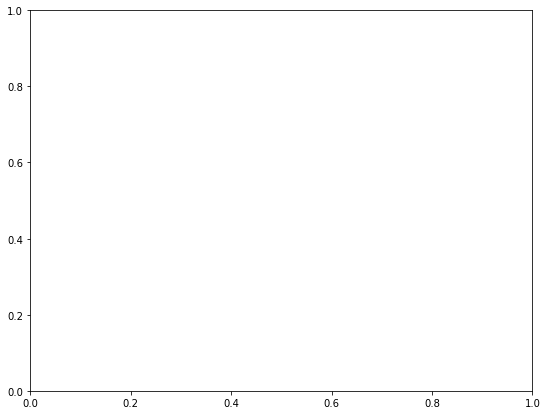

In [8]:
slst= list(df.state.unique())
fig, ax = plt.subplots(figsize=(9, 7))
for j in range(len(slst)):
    statelist = df[df.state==slst[j]]
    #_=ax.scatter('date', 'daily_cases',data =k)
    _=ax.plot('date','retail_and_recreation',data =statelist, color = color[j])
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()
_=ax.set_title('Retail_and_recreation')
_=ax.set_ylabel('Percentage')

In [16]:
temp2ca.shape

(467, 7)

In [30]:
X = temp2ca.iloc[:,1:6]
X = preprocessing.normalize(X)
y = temp2ca.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [22]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     5_days_predicted_cases   R-squared:                       0.192
Model:                                OLS   Adj. R-squared:                  0.183
Method:                     Least Squares   F-statistic:                     19.73
Date:                    Wed, 10 Jun 2020   Prob (F-statistic):           1.20e-17
Time:                            08:23:43   Log-Likelihood:                -3774.9
No. Observations:                     420   AIC:                             7562.
Df Residuals:                         414   BIC:                             7586.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        419.2704    248.001      1.691      0.092     -68.227     906.768
x1           153.4885    760.210      0.202      0.840   -1340.864    1647.841
x2         -1412.6896    506.510     -2.789      0.006   -2408.341    -417.038
x3           347.4746    230.821      1.505      0.133    -106.253     801.202
x4         -2925.1505    897.631     -3.259      0.001   -4689.633   -1160.668
x5          -468.2376    771.438     -0.607      0.544   -1984.662    1048.187
==============================================================================
Omnibus:                      219.116   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1152.328
Skew:                           2.291   Prob(JB):                    5.96e-251
Kurtosis:                       9.697   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=123)
model = model.fit(X_train, y_train)
pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
rmsle = np.sqrt(np.mean(np.power(np.log(np.array(abs(pred)) + 1) - np.log(np.array(abs(y_test)) + 1),2)))
r2 = metrics.r2_score(y_test, pred)
mask = y_test != 0
mape = (np.fabs(y_test - pred) / y_test)[mask].mean()
accuracy = str(round((1 - mape) * 100, 2)) + '%'
mae,mse,rmse,rmsle,r2,mape,accuracy, model.score(X_test,y_test)

(672.2709219858157,
 1312755.2411957448,
 1145.7553147141605,
 1.180621839033465,
 0.6365563572681631,
 4.4496865500705525,
 '-344.97%',
 0.6365563572681631)

In [ ]:
ExtraTreesRegressor(random_state=self.seed)

In [31]:
from pycaret.regression import *
exp_reg101 = setup(data = temp2ca, target = '5_days_predicted_cases', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(467, 7)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [32]:
compare_models()
mae,mse,rmse,rmsle,r2,mape,accuracy, model.score(X_test,y_test)


[38]:
(672.2709219858157,
 1312755.2411957448,
 1145.7553147141605,
 0.6365563572681631,
1.180621839033465,
 4.4496865500705525,
 
 
 
 
 '-344.97%',
 0.6365563572681631)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,896.852800,2227977.619400,1445.567700,0.543600,1.252500,5.971400
1,CatBoost Regressor,1005.321700,2640546.062700,1552.285000,0.473100,1.892700,9.867200
2,Random Forest,971.326200,2684822.189100,1574.074600,0.459900,1.260700,6.368400
3,Light Gradient Boosting Machine,1064.637200,2819346.199100,1652.047100,0.404000,1.927800,9.058300
4,Extreme Gradient Boosting,1049.741900,2893646.197100,1658.208300,0.390400,1.964900,8.020500
5,Gradient Boosting Regressor,1058.021600,2929830.925600,1658.983300,0.371200,1.940700,8.024600
6,K Neighbors Regressor,1081.446900,3290849.651500,1741.399900,0.350800,1.397300,8.897300
7,AdaBoost Regressor,1304.999500,3167978.363600,1739.509300,0.338900,3.071000,60.849800
8,Elastic Net,1342.943800,3890148.559600,1922.782600,0.236200,2.795100,35.383400
9,Linear Regression,1343.867300,3892730.645800,1923.422900,0.235600,2.798800,35.887500


In [81]:
tuned_dt= tune_model('xtree')

SystemExit: (Value Error): Estimator Not Available. Please see docstring for list of available estimators.

In [ ]:
plot_model(tuned_dt)
plot_model(tuned_dt, plot = 'error')
plot_model(tuned_dt, plot = 'feature')
evaluate_model(tuned_dt)
predict_model(tuned_dt)

(655.2,
 838117.4,
 915.487520395554,
 2.315560905543679,
 -0.3722375083749201,
 34.911522796453035,
 '-3391.15%')